In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(3+9)

12


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                          #visualization
import matplotlib.pyplot as plt
import researchpy as rp                         #statistics
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Upload data from home drive

from google.colab import files

uploaded_files = files.upload()

Saving COSC_535_US_COVID-19_Cases_and_Deaths_by_State_over_Time (1).csv to COSC_535_US_COVID-19_Cases_and_Deaths_by_State_over_Time (1).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded_files['COSC_535_US_COVID-19_Cases_and_Deaths_by_State_over_Time (1).csv']))
print(df)


      submission_date state  tot_cases conf_cases prob_cases new_case  \
0          01/14/2022    KS    621,273    470,516    150,757   19,414   
1          02/12/2021    UT    359,641    359,641          0    1,060   
2          02/04/2020    AR          0        NaN        NaN        0   
3          05/30/2022    AK    251,425        NaN        NaN        0   
4          05/17/2020   RMI          0          0          0        0   
...               ...   ...        ...        ...        ...      ...   
59815      03/16/2020    AL         36         36          0        8   
59816      07/31/2022   NYC  2,730,970  2,311,070    419,900   10,035   
59817      03/13/2021    IA    342,495        NaN        NaN      425   
59818      05/27/2021    OH  1,100,312    921,199    179,113      732   
59819      03/15/2022    MS    793,103    436,026    357,077      153   

      pnew_case tot_death conf_death prob_death new_death pnew_death  \
0         6,964     7,162        NaN        NaN    

In [ ]:
#Get sample of data

df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,"621,273","470,516","150,757","19,414","6,964","7,162",NaN,NaN,21,4,01/15/2022 02:59:30 PM,Agree,NaN
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,05/30/2022,AK,"251,425",NaN,NaN,0,0,"1,252",NaN,NaN,0,0,05/31/2022 01:20:20 PM,NaN,NaN
4,05/17/2020,RMI,0,0,0,0,0,0,0,0,0,0,05/18/2020 04:01:54 PM,Agree,Agree


In [ ]:
# Get sample of last records

df.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
59815,03/16/2020,AL,36,36,0,8,0,2,1,1,0,0,03/16/2020 12:00:00 AM,Agree,Agree
59816,07/31/2022,NYC,"2,730,970","2,311,070","419,900","10,035","1,704","41,110","35,526","5,584",13,1,08/01/2022 01:31:03 PM,Agree,Agree
59817,03/13/2021,IA,"342,495",NaN,NaN,425,77,"5,633",NaN,NaN,3,3,03/14/2021 01:53:25 PM,Not agree,Not agree
59818,05/27/2021,OH,"1,100,312","921,199","179,113",732,196,"19,753","19,753",0,0,0,05/28/2021 01:29:21 PM,Agree,Agree
59819,03/15/2022,MS,"793,103","436,026","357,077",153,34,"12,288","8,097","4,191",13,7,03/16/2022 01:23:12 PM,Agree,Agree


In [ ]:
#Get info on data - Columns, data types, and Non-null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59820 entries, 0 to 59819
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  59820 non-null  object
 1   state            59820 non-null  object
 2   tot_cases        59820 non-null  object
 3   conf_cases       33886 non-null  object
 4   prob_cases       33814 non-null  object
 5   new_case         59820 non-null  object
 6   pnew_case        56294 non-null  object
 7   tot_death        59820 non-null  object
 8   conf_death       33133 non-null  object
 9   prob_death       33133 non-null  object
 10  new_death        59820 non-null  object
 11  pnew_death       56326 non-null  object
 12  created_at       59820 non-null  object
 13  consent_cases    49845 non-null  object
 14  consent_deaths   50847 non-null  object
dtypes: object(15)
memory usage: 6.8+ MB


In [ ]:
# Get Descriptive statistics
#df.replace(',','', regex=True, inplace=True)
#df.head()
#df.describe()
#df.info
#df = df.astype({'tot_cases':'float','conf_cases':'float',	'prob_cases':'float',	'new_case':'float',	'pnew_case':'float', 'tot_death':'float',	'conf_death':'float',	'prob_death':'float',	'new_death':'float', 'pnew_death':'float'})
#df.dtypes
#df.describe()
df.round(2)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273.0,470516.0,150757.0,19414.0,6964.0,7162.0,NaN,NaN,21.0,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,02/12/2021,UT,359641.0,359641.0,0.0,1060.0,0.0,1785.0,1729.0,56.0,11.0,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,05/30/2022,AK,251425.0,NaN,NaN,0.0,0.0,1252.0,NaN,NaN,0.0,0.0,05/31/2022 01:20:20 PM,NaN,NaN
4,05/17/2020,RMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05/18/2020 04:01:54 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59815,03/16/2020,AL,36.0,36.0,0.0,8.0,0.0,2.0,1.0,1.0,0.0,0.0,03/16/2020 12:00:00 AM,Agree,Agree
59816,07/31/2022,NYC,2730970.0,2311070.0,419900.0,10035.0,1704.0,41110.0,35526.0,5584.0,13.0,1.0,08/01/2022 01:31:03 PM,Agree,Agree
59817,03/13/2021,IA,342495.0,NaN,NaN,425.0,77.0,5633.0,NaN,NaN,3.0,3.0,03/14/2021 01:53:25 PM,Not agree,Not agree
59818,05/27/2021,OH,1100312.0,921199.0,179113.0,732.0,196.0,19753.0,19753.0,0.0,0.0,0.0,05/28/2021 01:29:21 PM,Agree,Agree


In [ ]:
#Check for missing values

print(df.isnull().sum())

submission_date        0
state                  0
tot_cases              0
conf_cases         25934
prob_cases         26006
new_case               0
pnew_case           3526
tot_death              0
conf_death         26687
prob_death         26687
new_death              0
pnew_death          3494
created_at             0
consent_cases       9975
consent_deaths      8973
dtype: int64


In [ ]:
#Replace missing values with mean value

df.fillna(df.mean(), inplace=True)

<ipython-input-16-b8f9e707a700>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.head()
#df.round(2)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273.0,470516.000000,150757.000000,19414.0,6964.000000,7162.0,8992.119579,1088.855522,21.0,4.000000,01/15/2022 02:59:30 PM,Agree,NaN
1,02/12/2021,UT,359641.0,359641.000000,0.000000,1060.0,0.000000,1785.0,1729.000000,56.000000,11.0,2.000000,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0.0,649323.034764,106578.289495,0.0,268.047501,0.0,8992.119579,1088.855522,0.0,1.830984,03/26/2020 04:22:39 PM,Not agree,Not agree
3,05/30/2022,AK,251425.0,649323.034764,106578.289495,0.0,0.000000,1252.0,8992.119579,1088.855522,0.0,0.000000,05/31/2022 01:20:20 PM,NaN,NaN
4,05/17/2020,RMI,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,05/18/2020 04:01:54 PM,Agree,Agree


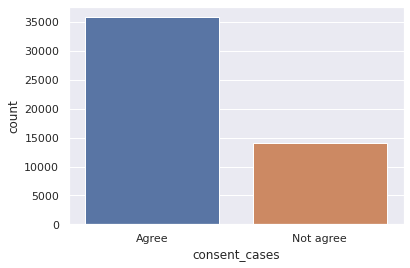

In [ ]:
sns.countplot(x='consent_cases', data=df);

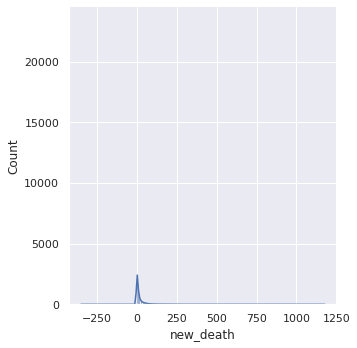

In [ ]:
sns.displot(df.new_death, kde=True);

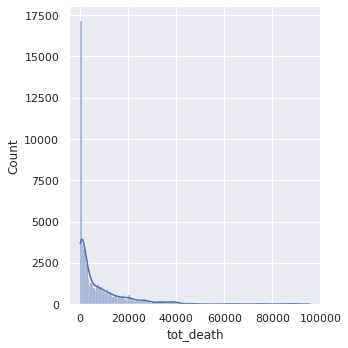

In [ ]:
sns.displot(df.tot_death, kde=True);

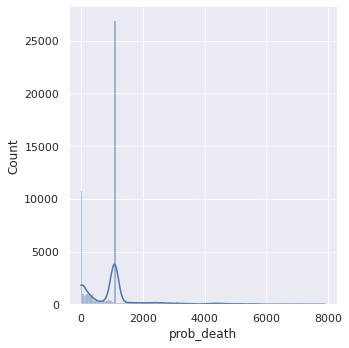

In [ ]:
sns.displot(df.prob_death, kde=True);

sns.displot(df.prob_death, kde=True);

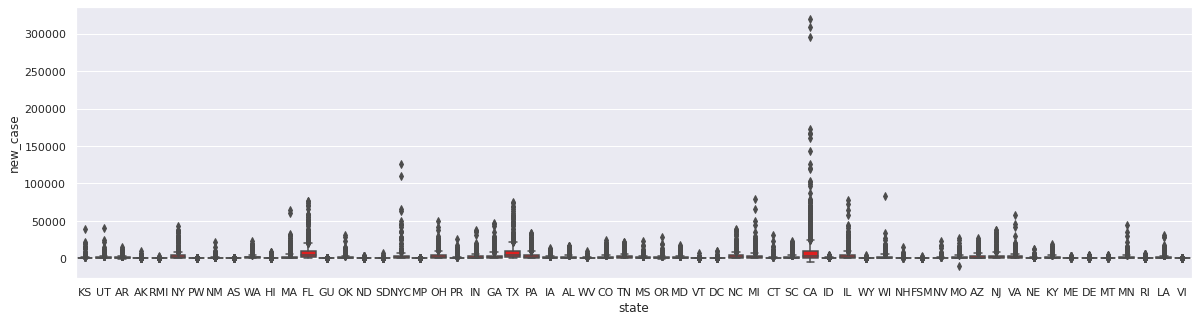

In [ ]:
#sns.relplot(data=df, x='prob_cases', y='new_case', hue='state')	

plt.figure(figsize=(20,5))

sns.boxplot(
    data=df,
    x='state',
    y='new_case',
    color='red')

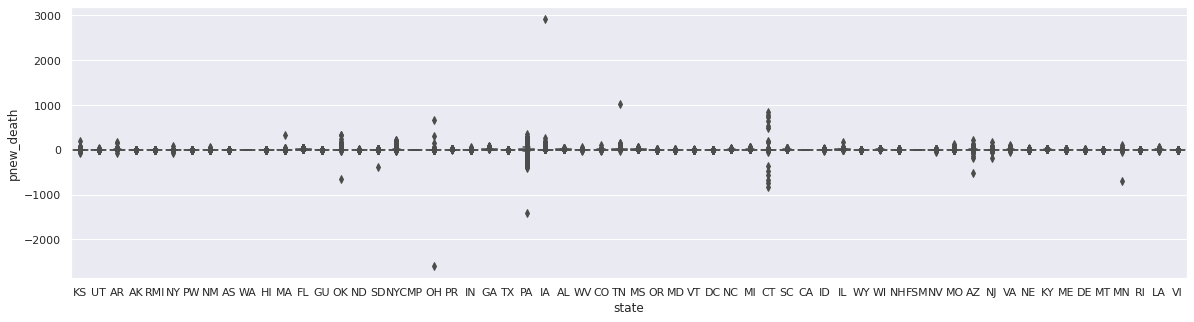

In [ ]:
#sns.relplot(data=df, x='new_death', y='pnew_death', hue='state')	

plt.figure(figsize=(20,5))

sns.boxplot(
    data=df,
    x='state',
    y='pnew_death',
    color='red')

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
tot_cases,1.000000,0.756813,0.548659,0.372077,0.213620,0.949292,0.472085,0.315930,0.269341,0.021696
conf_cases,0.756813,1.000000,0.647428,0.287393,0.110427,0.672803,0.566147,0.344347,0.176070,0.010325
prob_cases,0.548659,0.647428,1.000000,0.160908,0.155176,0.514389,0.502032,0.586338,0.064064,0.025349
new_case,0.372077,0.287393,0.160908,1.000000,0.417077,0.379008,0.173176,0.090481,0.442919,0.045915
pnew_case,0.213620,0.110427,0.155176,0.417077,1.000000,0.222528,0.082015,0.094710,0.203345,0.045345
tot_death,0.949292,0.672803,0.514389,0.379008,0.222528,1.000000,0.580015,0.397050,0.327189,0.029020
conf_death,0.472085,0.566147,0.502032,0.173176,0.082015,0.580015,1.000000,0.596872,0.189081,0.020857
prob_death,0.315930,0.344347,0.586338,0.090481,0.094710,0.397050,0.596872,1.000000,0.052944,0.053522
new_death,0.269341,0.176070,0.064064,0.442919,0.203345,0.327189,0.189081,0.052944,1.000000,0.167547
pnew_death,0.021696,0.010325,0.025349,0.045915,0.045345,0.029020,0.020857,0.053522,0.167547,1.000000


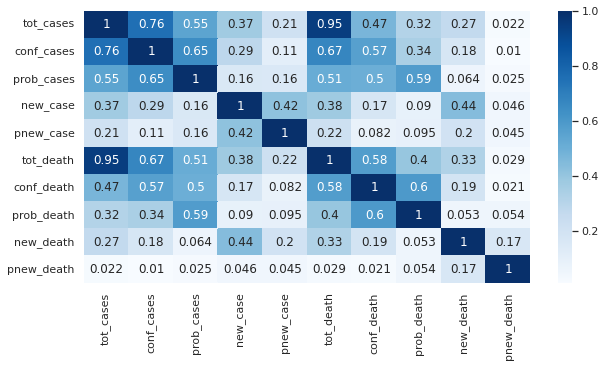

In [ ]:
# Get the correlation

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="Blues",annot=True)
c

In [ ]:

df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,5.982000e+04,5.982000e+04,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000
mean,6.531278e+05,6.493230e+05,106578.289495,1606.281260,268.047501,9317.832715,8992.119579,1088.855522,17.421715,1.830984
std,1.167546e+06,8.071059e+05,118041.624232,5083.391375,1398.940260,14551.491769,7753.949963,1149.552171,43.569364,23.856680
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,1.807450e+04,2.169028e+05,16782.000000,3.000000,0.000000,356.750000,3860.750000,239.000000,0.000000,0.000000
50%,2.206175e+05,6.493230e+05,106578.289495,346.000000,6.000000,3221.000000,8992.119579,1088.855522,3.000000,0.000000
75%,8.112800e+05,6.493230e+05,106578.289495,1440.000000,265.000000,12276.750000,8992.119579,1088.855522,16.000000,1.000000
max,1.130924e+07,1.045879e+07,850445.000000,319809.000000,171617.000000,95604.000000,71408.000000,7889.000000,1178.000000,2919.000000


In [ ]:
# Differential Privacy Variables

# STEP 4 = DP = f(x) + Laplace (0,b)
# STEP 3 = b = delta_f / e
# STEP 2 = delta_f = Max|d1 - d2|
# STEP 1 = e = small epsilon value = Privacy Budget

# e = 1.893

In [ ]:
e = 1.893
#=================================================================
# STEP 2 – Calculate delta_f = max diff |d1 - d2|
#=================================================================
						
delta_tot_cases = (df['tot_cases'].max() - df['tot_cases'].min())

delta_conf_cases = (df['conf_cases'].max() - df['conf_cases'].min())

delta_prob_cases = (df['prob_cases'].max() - df['prob_cases'].min())

delta_new_case = (df['new_case'].max() - df['new_case'].min())

delta_pnew_case = (df['pnew_case'].max() - df['pnew_case'].min())

delta_tot_death = (df['tot_death'].max() - df['tot_death'].min())

delta_conf_death = (df['conf_death'].max() - df['conf_death'].min())

delta_prob_death = (df['prob_death'].max() - df['prob_death'].min())

delta_new_death = (df['new_death'].max() - df['new_death'].min())

delta_pnew_death = (df['pnew_death'].max() - df['pnew_death'].min())

In [ ]:
d_tot_cases = delta_tot_cases/e  

d_conf_cases = delta_conf_cases/e  

d_prob_cases=delta_prob_cases/e

d_new_case = delta_new_case /e

d_pnew_case  = delta_pnew_case /e

d_tot_death = delta_tot_death/e

d_conf_death =delta_conf_death /e 

d_prob_death = delta_prob_death /e

d_new_death= delta_new_death /e

d_pnew_death = delta_pnew_death /e

In [ ]:
df1 = df

In [ ]:
df1.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273.0,470516.000000,150757.000000,19414.0,6964.000000,7162.0,8992.119579,1088.855522,21.0,4.000000,01/15/2022 02:59:30 PM,Agree,NaN
1,02/12/2021,UT,359641.0,359641.000000,0.000000,1060.0,0.000000,1785.0,1729.000000,56.000000,11.0,2.000000,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0.0,649323.034764,106578.289495,0.0,268.047501,0.0,8992.119579,1088.855522,0.0,1.830984,03/26/2020 04:22:39 PM,Not agree,Not agree
3,05/30/2022,AK,251425.0,649323.034764,106578.289495,0.0,0.000000,1252.0,8992.119579,1088.855522,0.0,0.000000,05/31/2022 01:20:20 PM,NaN,NaN
4,05/17/2020,RMI,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,05/18/2020 04:01:54 PM,Agree,Agree


In [ ]:
#=================================================================
# STEP 4 – Generate random Laplace noise between 0.0 and b
#=================================================================

# random.uniform(0.0, b)

df1['d_tot_cases_laplace'] = np.random.uniform(0, d_tot_cases, size=(len(df1),1))

df1['d_conf_cases_laplace'] = np.random.uniform(0, d_conf_cases , size=(len(df1),1))

df1['d_prob_cases_laplace'] = np.random.uniform(0, d_prob_cases , size=(len(df1),1))

df1['d_new_case_laplace'] = np.random.uniform(0, d_new_case , size=(len(df1),1))


df1['d_pnew_case_laplace'] = np.random.uniform(0, d_pnew_case , size=(len(df1),1))


df1['d_tot_death _laplace'] = np.random.uniform(0, d_tot_death , size=(len(df1),1))

df1['d_conf_death_laplace'] = np.random.uniform(0, d_conf_death , size=(len(df1),1))

df1['d_prob_death_laplace'] = np.random.uniform(0,d_prob_death , size=(len(df1),1))

df1['d_new_death_laplace'] = np.random.uniform(0, d_new_death , size=(len(df1),1))


df1['d_pnew_death_laplace'] = np.random.uniform(0, d_pnew_death , size=(len(df1),1))



In [ ]:
df1['d_pnew_death_laplace'].head()

0    1094.151329
1     799.706801
2    1489.573819
3    1723.742455
4     749.410078
Name: d_pnew_death_laplace, dtype: float64

In [ ]:
df1.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,...,d_tot_cases_laplace,d_conf_cases_laplace,d_prob_cases_laplace,d_new_case_laplace,d_pnew_case_laplace,d_tot_death _laplace,d_conf_death_laplace,d_prob_death_laplace,d_new_death_laplace,d_pnew_death_laplace
0,01/14/2022,KS,621273.0,470516.000000,150757.000000,19414.0,6964.000000,7162.0,8992.119579,1088.855522,...,2.410664e+06,1.699928e+06,204268.048644,174138.828798,107665.378524,14541.881503,1337.928392,3299.538028,184.575982,445.713359
1,02/12/2021,UT,359641.0,359641.000000,0.000000,1060.0,0.000000,1785.0,1729.000000,56.000000,...,9.371900e+04,2.949136e+05,98104.425436,114237.670162,89845.325044,34151.801309,1283.219093,195.658742,607.298203,798.360349
2,02/04/2020,AR,0.0,649323.034764,106578.289495,0.0,268.047501,0.0,8992.119579,1088.855522,...,2.938909e+06,2.322675e+06,426460.263174,9956.674357,99060.683008,29534.524068,13115.585792,606.176913,53.130359,724.348016
3,05/30/2022,AK,251425.0,649323.034764,106578.289495,0.0,0.000000,1252.0,8992.119579,1088.855522,...,5.765720e+06,4.877739e+06,432357.700418,99815.244185,18145.849490,27321.067052,935.334366,2995.068043,452.342262,2580.773802
4,05/17/2020,RMI,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,5.574814e+06,1.969360e+06,56968.333056,35786.038966,18174.697959,27603.180246,13117.540559,1436.992553,192.489700,465.091218


In [ ]:
#=================================================================
# STEP 5 – Add the generated Laplace noise to the original column
#=================================================================
					

df1['d_tot_cases_privatized'] =  (df1['tot_cases'] + df1['d_tot_cases_laplace']) 

df1['d_conf_cases_privatized']  =  (df1['conf_cases'] + df1['d_conf_cases_laplace']) 

df1['d_prob_cases_privatized']  = (df1['prob_cases'] + df1['d_prob_cases_laplace']) 

df1['d_new_case_privatized'] = (df1['new_case'] + df1['d_new_case_laplace'])


df1['d_pnew_case_privatized'] = (df1['pnew_case'] + df1['d_pnew_case_laplace'] )


df1['d_tot_death_privatized'] = (df1['tot_death'] + df1['d_tot_death _laplace']) 

df1['d_conf_death_privatized'] = (df1['conf_death'] + df1['d_conf_death_laplace']) 

df1['d_prob_death_privatized'] = (df1['prob_death'] + df1['d_prob_death_laplace']) 
 
df1['d_new_death_privatized']  = (df1['new_death'] + df1['d_new_death_laplace'] )

In [ ]:
# Check sample of privatized data
df1['d_new_death_privatized'].head()

0    573.488150
1    196.107874
2    654.969954
3    717.733164
4    629.317337
Name: d_new_death_privatized, dtype: float64

In [ ]:
# Get new data sample
df1.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,...,d_pnew_death_laplace,d_tot_cases_privatized,d_conf_cases_privatized,d_prob_cases_privatized,d_new_case_privatized,d_pnew_case_privatized,d_tot_death_privatized,d_conf_death_privatized,d_prob_death_privatized,d_new_death_privatized
0,01/14/2022,KS,621273.0,470516.000000,150757.000000,19414.0,6964.000000,7162.0,8992.119579,1088.855522,...,1094.151329,1.270762e+06,8.016145e+05,395351.833439,94727.850063,83032.610231,13071.021696,23039.709982,1768.779234,573.488150
1,02/12/2021,UT,359641.0,359641.000000,0.000000,1060.0,0.000000,1785.0,1729.000000,56.000000,...,799.706801,1.076741e+06,4.455707e+06,381567.300982,72564.676854,42242.894376,8497.651505,3849.988592,1453.494189,196.107874
2,02/04/2020,AR,0.0,649323.034764,106578.289495,0.0,268.047501,0.0,8992.119579,1088.855522,...,1489.573819,3.174415e+05,2.054590e+06,245330.310151,23000.864286,61998.381162,45414.954900,15794.752357,4219.170683,654.969954
3,05/30/2022,AK,251425.0,649323.034764,106578.289495,0.0,0.000000,1252.0,8992.119579,1088.855522,...,1723.742455,2.825969e+06,1.868606e+06,342429.191277,115407.318207,97795.375319,21156.407750,17166.335537,1188.235470,717.733164
4,05/17/2020,RMI,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,749.410078,9.346747e+05,5.344040e+06,415579.493708,104193.220774,149870.014968,32891.150732,4714.817036,2051.323909,629.317337


In [ ]:
#=================================================================
# STEP 6 – Split data frame – Original and Privatized for analysis
#=================================================================


df1_original = df1[['tot_cases','conf_cases','prob_cases','new_case','pnew_case','tot_death','conf_death','prob_death','new_death','pnew_death']]
df1_privatized = df1[['d_tot_cases_privatized', 'd_conf_cases_privatized', 'd_prob_cases_privatized', 'd_new_case_privatized','d_pnew_case_privatized','d_tot_death_privatized','d_conf_death_privatized','d_prob_death_privatized','d_new_death_privatized']]

In [ ]:
df1_original.head()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,621273.0,470516.000000,150757.000000,19414.0,6964.000000,7162.0,8992.119579,1088.855522,21.0,4.000000
1,359641.0,359641.000000,0.000000,1060.0,0.000000,1785.0,1729.000000,56.000000,11.0,2.000000
2,0.0,649323.034764,106578.289495,0.0,268.047501,0.0,8992.119579,1088.855522,0.0,1.830984
3,251425.0,649323.034764,106578.289495,0.0,0.000000,1252.0,8992.119579,1088.855522,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
df1_privatized.head()

,d_tot_cases_privatized,d_conf_cases_privatized,d_prob_cases_privatized,d_new_case_privatized,d_pnew_case_privatized,d_tot_death_privatized,d_conf_death_privatized,d_prob_death_privatized,d_new_death_privatized
0,3.031937e+06,2.170444e+06,355025.048644,193552.828798,114629.378524,21703.881503,10330.047971,4388.393550,205.575982
1,4.533600e+05,6.545546e+05,98104.425436,115297.670162,89845.325044,35936.801309,3012.219093,251.658742,618.298203
2,2.938909e+06,2.971998e+06,533038.552669,9956.674357,99328.730509,29534.524068,22107.705371,1695.032435,53.130359
3,6.017145e+06,5.527062e+06,538935.989914,99815.244185,18145.849490,28573.067052,9927.453945,4083.923565,452.342262
4,5.574814e+06,1.969360e+06,56968.333056,35786.038966,18174.697959,27603.180246,13117.540559,1436.992553,192.489700


In [ ]:
 import researchpy as des, res, =rp.ttest(df[x'], df['y'], paired=True)

In [ ]:
df1_original.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,5.982000e+04,5.982000e+04,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000
mean,6.531278e+05,6.493230e+05,106578.289495,1606.281260,268.047501,9317.832715,8992.119579,1088.855522,17.421715,1.830984
std,1.167546e+06,8.071059e+05,118041.624232,5083.391375,1398.940260,14551.491769,7753.949963,1149.552171,43.569364,23.856680
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,1.807450e+04,2.169028e+05,16782.000000,3.000000,0.000000,356.750000,3860.750000,239.000000,0.000000,0.000000
50%,2.206175e+05,6.493230e+05,106578.289495,346.000000,6.000000,3221.000000,8992.119579,1088.855522,3.000000,0.000000
75%,8.112800e+05,6.493230e+05,106578.289495,1440.000000,265.000000,12276.750000,8992.119579,1088.855522,16.000000,1.000000
max,1.130924e+07,1.045879e+07,850445.000000,319809.000000,171617.000000,95604.000000,71408.000000,7889.000000,1178.000000,2919.000000


In [ ]:
df1_privatized.describe()

,d_tot_cases_privatized,d_conf_cases_privatized,d_prob_cases_privatized,d_new_case_privatized,d_pnew_case_privatized,d_tot_death_privatized,d_conf_death_privatized,d_prob_death_privatized,d_new_death_privatized
count,5.982000e+04,5.982000e+04,5.982000e+04,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000,59820.000000
mean,3.636390e+06,3.415693e+06,3.312258e+05,88581.589827,90487.190222,34506.133836,27828.906339,3176.902386,422.069305
std,2.076077e+06,1.789144e+06,1.748678e+05,50440.205942,52346.944032,20540.211368,13280.681766,1666.036192,237.803124
min,9.491258e+02,6.958292e+01,2.939522e+01,1.978289,-4675.602970,14.768626,1.519615,0.652732,-126.590283
25%,2.009786e+06,1.975172e+06,1.987072e+05,45015.335908,45017.792220,19213.124577,17540.735945,1922.501261,220.104717
50%,3.581566e+06,3.397429e+06,3.216355e+05,88493.493188,90419.806325,33270.704001,27488.914743,3082.233132,420.978931
75%,5.090171e+06,4.771977e+06,4.391007e+05,132084.137981,135714.290814,46418.331471,37123.235367,4178.020439,624.455897
max,1.715957e+07,1.586394e+07,1.269184e+06,376109.063379,226422.241486,145547.334812,105317.386436,11711.398223,1684.549637


In [ ]:
df1_original.apply(df1_privatized.corrwith)

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
d_tot_cases_privatized,0.559519,0.428133,0.307321,0.208837,0.120370,0.532399,0.267638,0.182167,0.152940,0.007496
d_conf_cases_privatized,0.342506,0.450834,0.292588,0.130016,0.053266,0.304209,0.253912,0.157592,0.074931,0.005945
d_prob_cases_privatized,0.361807,0.430857,0.670137,0.105108,0.097979,0.339727,0.335464,0.393069,0.041514,0.015601
d_new_case_privatized,0.029549,0.029619,0.011631,0.091721,0.045960,0.031135,0.017906,0.007368,0.047173,0.005495
d_pnew_case_privatized,0.005196,0.003437,0.003755,0.015611,0.022023,0.007389,0.010218,0.003380,0.004510,-0.000329
d_tot_death_privatized,0.667885,0.476552,0.365146,0.266956,0.152363,0.704527,0.409481,0.285337,0.229203,0.015873
d_conf_death_privatized,0.274661,0.325630,0.294442,0.098684,0.047684,0.336192,0.575191,0.349492,0.107605,0.012529
d_prob_death_privatized,0.222204,0.243179,0.401607,0.065646,0.068702,0.279367,0.417797,0.690077,0.041405,0.040637
d_new_death_privatized,0.048905,0.024502,0.004565,0.079911,0.039133,0.059329,0.028924,0.004631,0.183560,0.025643


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df1_original.apply(df1_privatized.corrwith),cmap='Blues', linewidths=.5, annot=True)


NameError: ignored

In [ ]:
# T-Test - compare if there is a significant difference between two means

des, res, = rp.ttest(df1_original['tot_cases'], df1_privatized['d_tot_cases_privatized'], paired=True)

In [ ]:
des

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,tot_cases,59820.0,6.531278e+05,1.167546e+06,4773.653054,6.437714e+05,6.624841e+05
1,d_tot_cases_privatized,59820.0,3.636390e+06,2.076077e+06,8488.291739,3.619752e+06,3.653027e+06
2,diff,59820.0,-2.983262e+06,1.720700e+06,7035.288014,-2.997051e+06,-2.969473e+06


In [ ]:
res

,Paired samples t-test,results
0,Difference (tot_cases - d_tot_cases_privatized...,-2.983262e+06
1,Degrees of freedom =,5.981900e+04
2,t =,-4.240426e+02
3,Two side test p value =,0.000000e+00
4,Difference < 0 p value =,0.000000e+00
5,Difference > 0 p value =,1.000000e+00
6,Cohen's d =,-1.839500e+00
7,Hedge's g =,-1.839500e+00
8,Glass's delta1 =,-2.555200e+00
9,Point-Biserial r =,-8.662000e-01
